You will need to create an account at IRSA/IPAC (https://irsa.ipac.caltech.edu/account/signon/login.do?josso_back_to=https://irsa.ipac.caltech.edu/docs/program_interface/ztf_lightcurve_api.html)


Important links:

https://github.com/MickaelRigault/ztfquery (ztfquery documentation)

https://irsa.ipac.caltech.edu/docs/program_interface/ztf_lightcurve_api.html (ZTF Lightcurve Queries parameters)

https://astroquery.readthedocs.io/en/latest/ipac/irsa/irsa.html (IRSA query)


In [1]:
#%pip install ztfquery
#%pip install ipympl
#%pip install numpy==1.23

from ztfquery import lightcurve
from tqdm import tqdm

import os
import pandas as pd
import matplotlib.pyplot as plt

Progress:  10%|█         | 1/10 [00:17<02:40, 17.79s/line]


Final results for RA: 0.04983333, DEC: 0.04033333



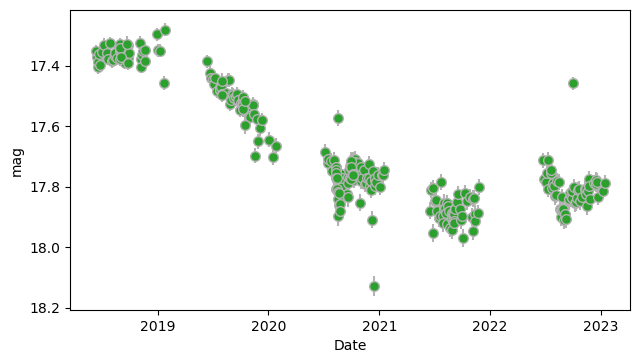

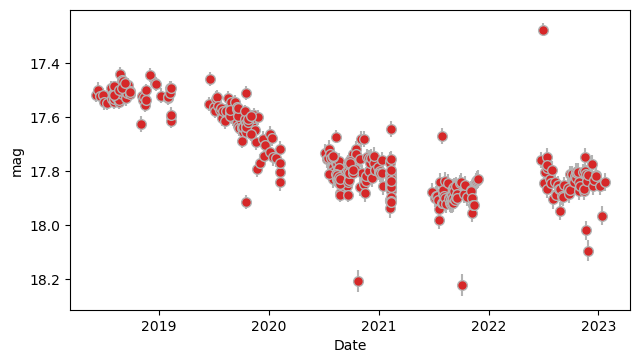

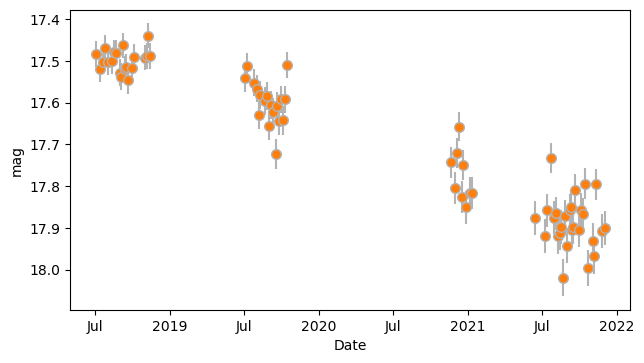

Done.


Progress:  20%|██        | 2/10 [00:45<03:08, 23.51s/line]


Final results for RA: 0.06141667, DEC: 0.53422222



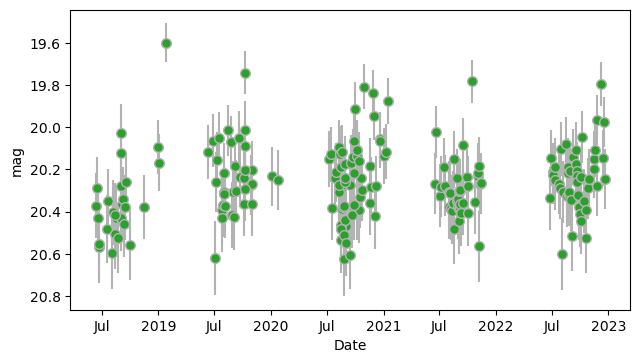

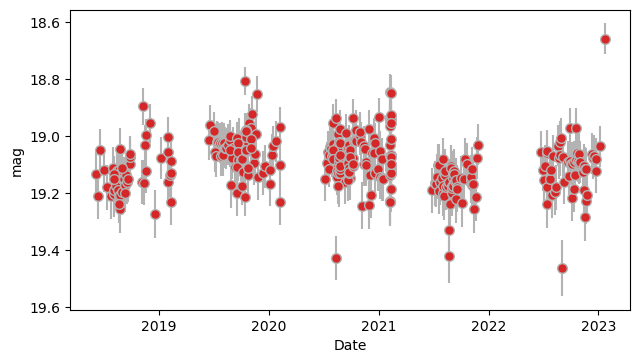

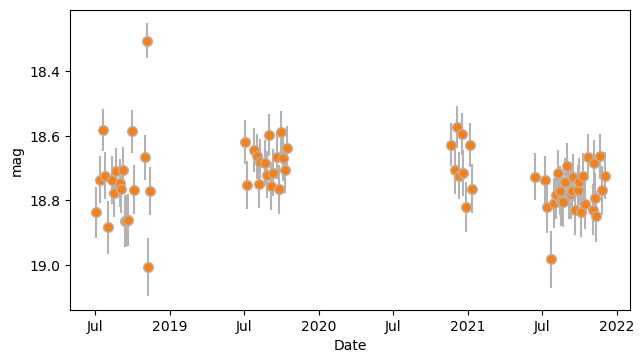

Done.


Progress:  30%|███       | 3/10 [01:08<02:41, 23.14s/line]


Final results for RA: 0.0645, DEC: 0.87966667



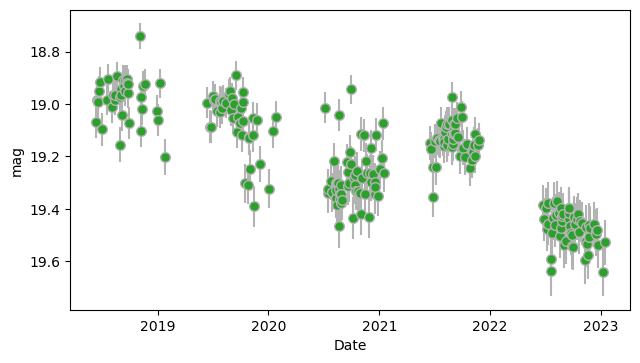

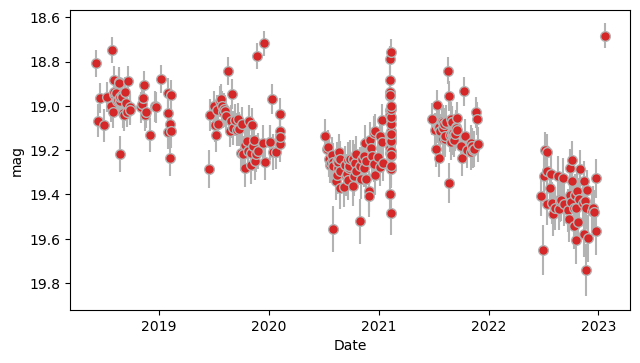

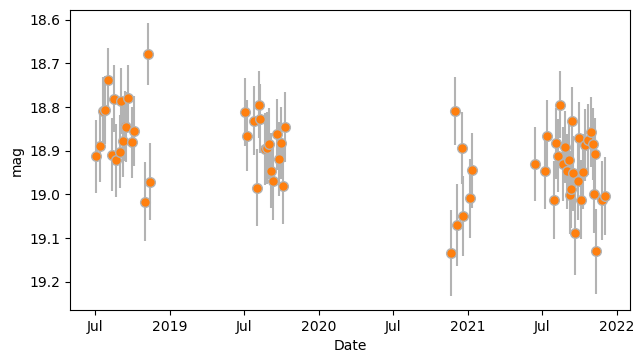

Done.


Progress:  40%|████      | 4/10 [01:32<02:21, 23.57s/line]


Final results for RA: 0.06845833, DEC: -0.30927778



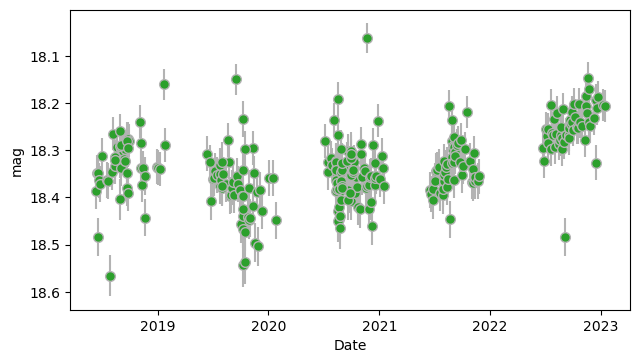

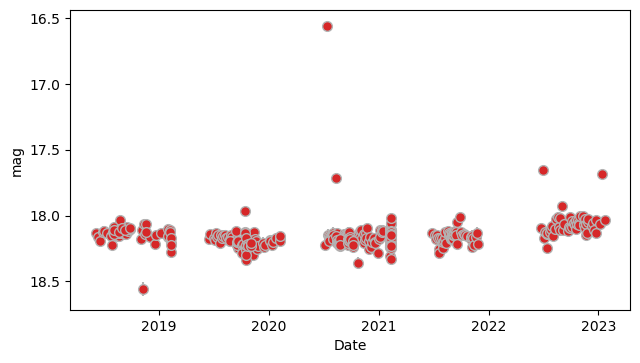

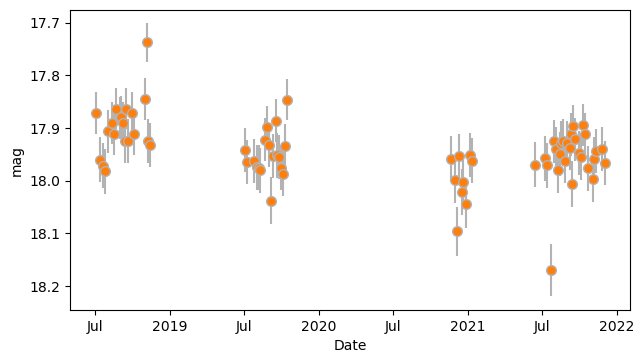

Done.


Progress:  50%|█████     | 5/10 [02:01<02:08, 25.66s/line]


Final results for RA: 0.1625, DEC: -0.30111111



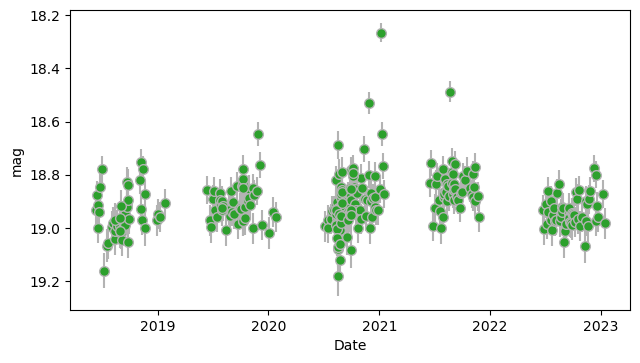

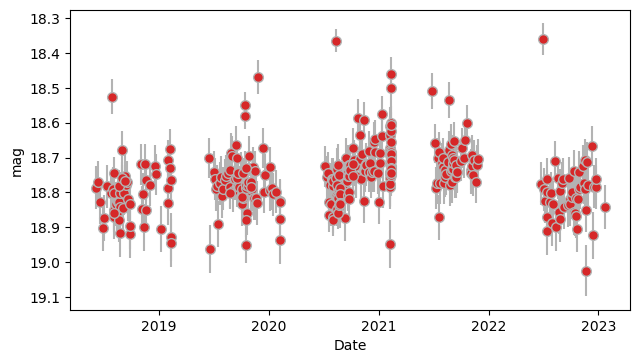

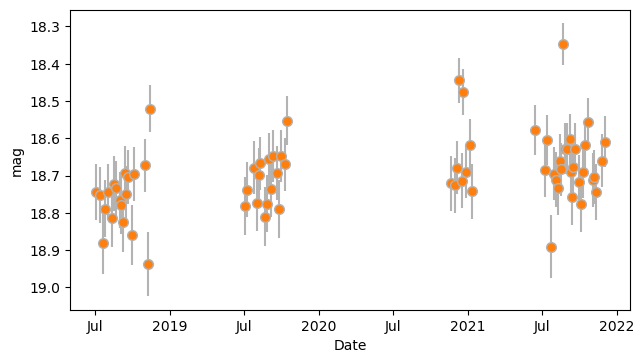

Done.


Progress:  60%|██████    | 6/10 [02:21<01:34, 23.61s/line]


Final results for RA: 0.17875001, DEC: 0.92763889



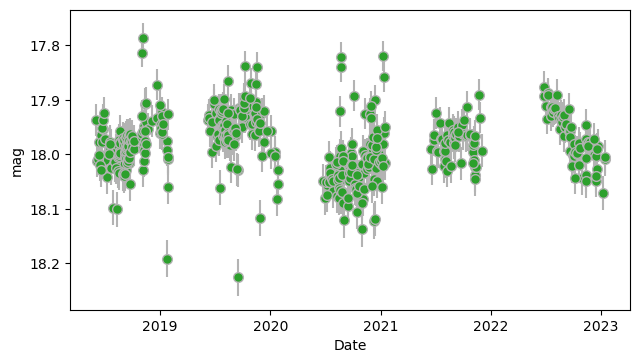

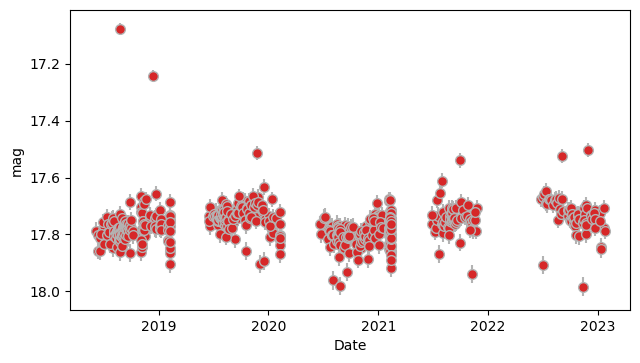

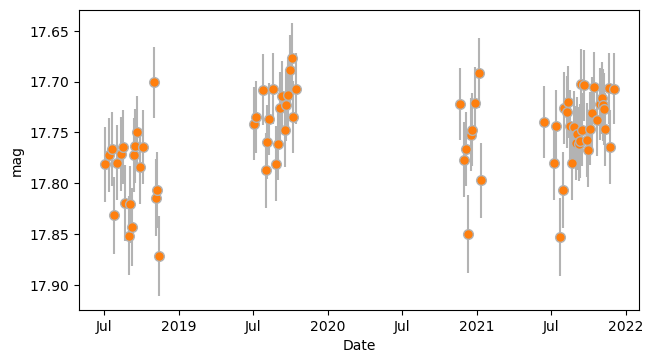

Done.


Progress:  70%|███████   | 7/10 [03:46<02:11, 43.69s/line]


Final results for RA: 0.21079167, DEC: 1.16641667



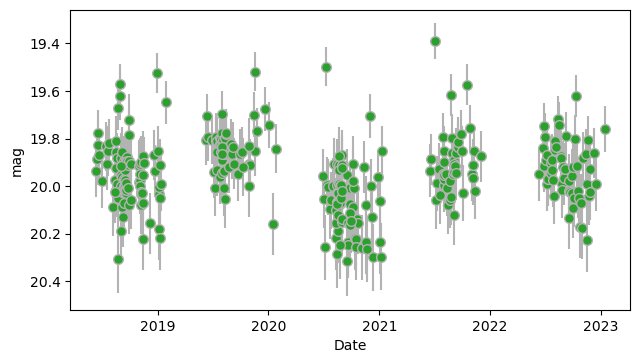

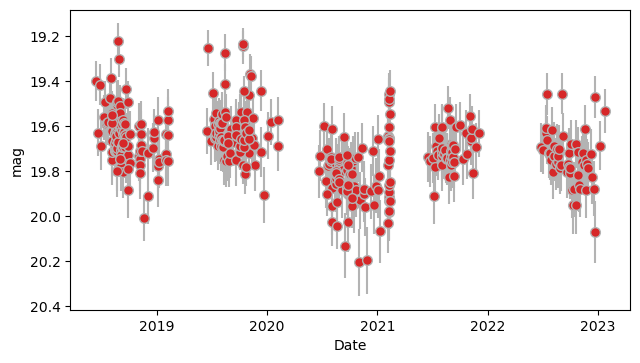

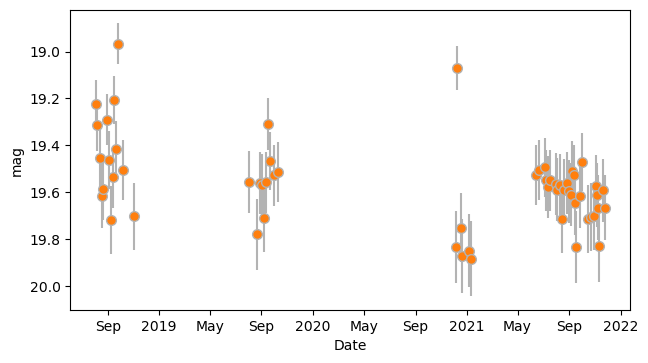

Done.


Progress:  80%|████████  | 8/10 [05:10<01:53, 56.71s/line]


Final results for RA: 0.22120833, DEC: -0.62022222



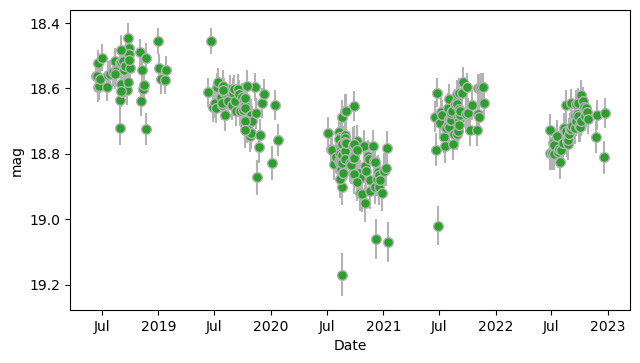

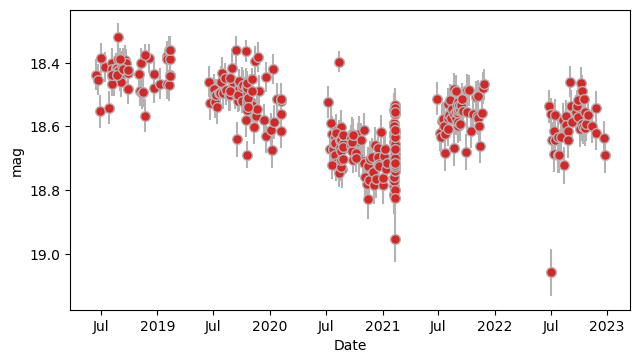

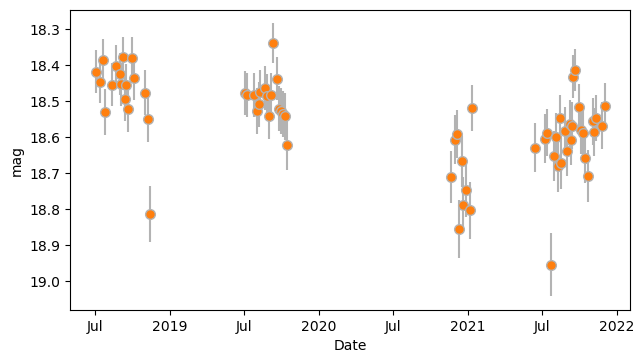

Done.


Progress:  90%|█████████ | 9/10 [05:34<00:46, 46.25s/line]


Final results for RA: 0.24258334, DEC: -0.77958333



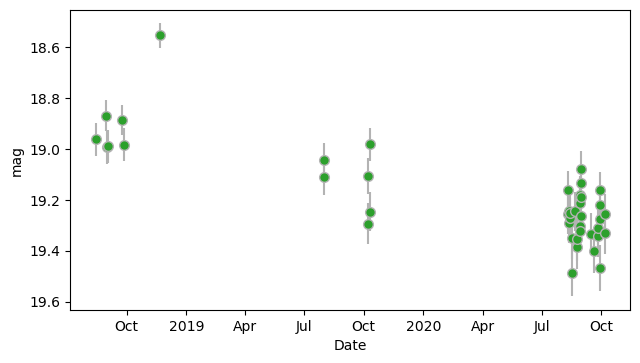

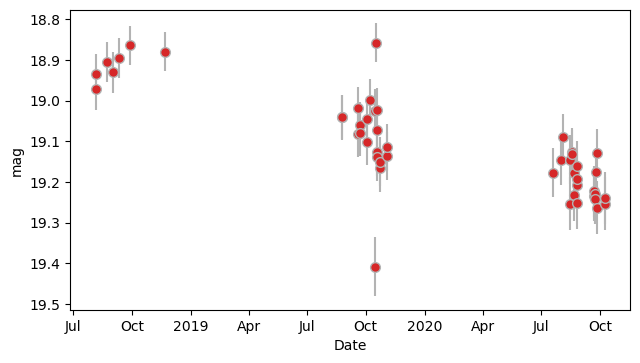

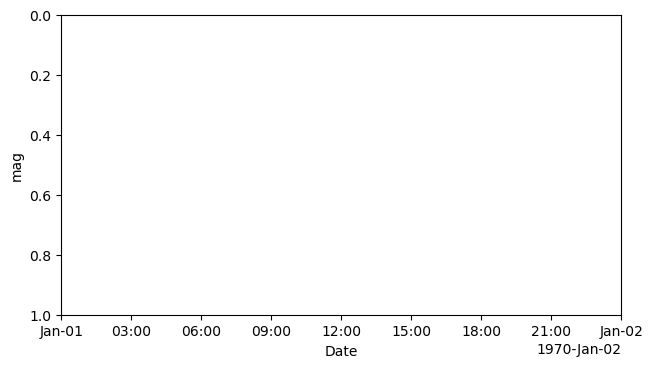

Download not approved.


Progress: 100%|██████████| 10/10 [06:00<00:00, 40.04s/line]


Final results for RA: 0.244875, DEC: 0.58625



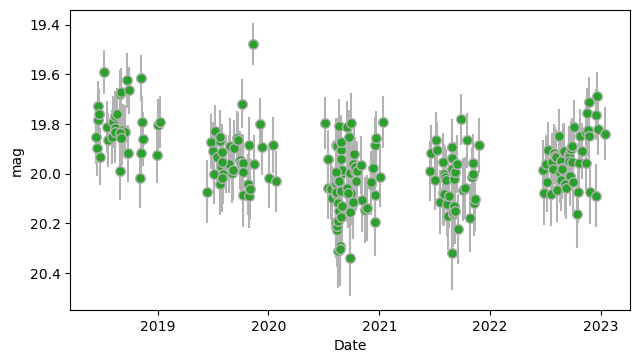

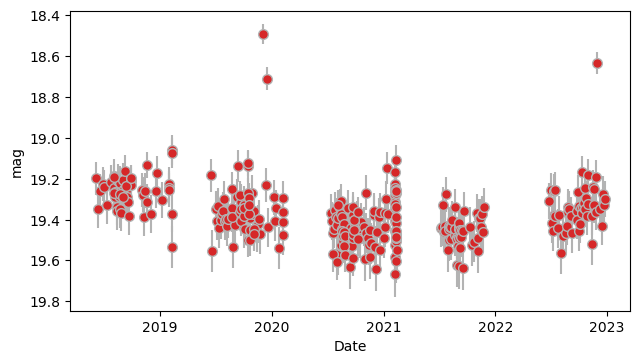

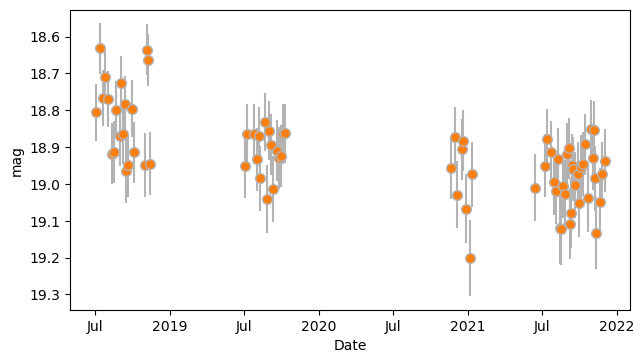

Done.


In [2]:
file_name= 'teste_sample.xlsx'
radius = 0.0003  # Degrees, limited to (0,0.1667].
#time=55555.5 55678.9 # Retrieve only data in the MJD range 55555.5 -> 555678.9:

# Creating a DataFrame
coord_df = pd.read_excel(file_name)

# Progress bar
pbar = tqdm(total=len(coord_df), desc='Progress', unit='line', leave=False)

# Create a folder named data
if not os.path.exists('data'):
    os.makedirs('data')

plots_path = os.path.join('data', 'plots')
if not os.path.exists(plots_path):
    os.makedirs(plots_path)

while True:
    try:
        for index, row in coord_df.iterrows():
                
            ra = row['ra']  #Degrees
            dec = row['dec']  #Degreees


            datag = lightcurve.LCQuery.download_data(circle=[ra,dec,radius], bandname="g")#,TIME=time) 
            lcgg = lightcurve.LCQuery(datag)
            tableg = datag[['mjd','mag', 'magerr']] #g-band data

            datar = lightcurve.LCQuery.download_data(circle=[ra,dec,radius], bandname="r")
            lcrr = lightcurve.LCQuery(datar)
            tabler = datar[['mjd','mag', 'magerr']] #r-band data

            datai = lightcurve.LCQuery.download_data(circle=[ra,dec,radius], bandname="i")
            lcii = lightcurve.LCQuery(datai)
            tablei = datai[['mjd','mag', 'magerr']] #i-band data 
            
            pbar.update(1)


            # Plotting light curves (if you are using "Download WITHOUT approval" delete this)
            print('\n' + '='*50 + f'\nFinal results for RA: {ra}, DEC: {dec}\n' + '='*50 + '\n') 
  
            lcgg.show()
            plt.show()

            lcrr.show()
            plt.show()
 
            lcii.show()
            plt.show()
  
            # Creating a folder for each coordinate
            pasta_ra_dec = f'ra{ra}_dec{dec}'
            pasta_path = os.path.join('data', pasta_ra_dec)

            if not os.path.exists(pasta_path):
                os.makedirs(pasta_path)

            #-----------------------------------------------------------------------------------------------------#
  
            # Download WITHOUT approval (for a big sample):
 
            #tableg.to_csv(os.path.join(pasta_path, f'{pasta_ra_dec}_g.dat'), sep='\t', index=False)
            #tabler.to_csv(os.path.join(pasta_path, f'{pasta_ra_dec}_r.dat'), sep='\t', index=False)
            #tablei.to_csv(os.path.join(pasta_path, f'{pasta_ra_dec}_i.dat'), sep='\t', index=False)
    
            #fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    
            #axs[0].errorbar(tableg['mjd'], tableg['mag'], yerr=tableg['magerr'], label='g-band', fmt='o',ecolor='darkgrey',markeredgecolor='darkgrey',markersize =7, color='r') 
            #axs[0].legend()
            #axs[0].set_xlabel('MJD')
            #axs[0].set_ylabel('Magnitude')
            #axs[0].invert_yaxis()
            #axs[0].set_title((ra,dec)) 
    
            #axs[1].errorbar(tabler['mjd'], tabler['mag'], yerr=tabler['magerr'], label='r-band', fmt='o',ecolor='darkgrey',markeredgecolor='darkgrey',markersize =7, color='g')
            #axs[1].legend()
            #axs[1].set_xlabel('MJD')
            #axs[1].set_ylabel('Magnitude')
            #axs[1].invert_yaxis()
            #axs[1].set_title((ra,dec)) 
    
            #axs[2].errorbar(tablei['mjd'], tablei['mag'], yerr=tablei['magerr'], label='i-band', fmt='o',ecolor='darkgrey',markeredgecolor='darkgrey',markersize =7, color='darkorange')
            #axs[2].legend()
            #axs[2].set_xlabel('MJD')
            #axs[2].set_ylabel('Magnitude')
            #axs[2].invert_yaxis()
            #axs[2].set_title((ra,dec)) 
 
            #plt.tight_layout()
            #plt.savefig(os.path.join(pasta_path, f'{pasta_ra_dec}_plot.png')) #save plots with the .dat file for each coordinate
            #plt.savefig(os.path.join(plots_path, f'ra{ra}_dec{dec}_subplots.png')) #save all plots in the same folder

            #plt.close()  
  
            #-----------------------------------------------------------------------------------------------------#   

            # Download WITH approval:
   
            download_approval = input(f'Do you want to download the data for {pasta_ra_dec}? (Y/N): ')
   
            if download_approval.lower() == 'y':
                fig, axs = plt.subplots(3, 1, figsize=(10, 15))
   
                axs[0].errorbar(tableg['mjd'], tableg['mag'], yerr=tableg['magerr'], label='g-band', fmt='o',ecolor='darkgrey',markeredgecolor='darkgrey',markersize=5, color='r')
                axs[0].legend()
                axs[0].set_xlabel('MJD')
                axs[0].set_ylabel('Magnitude')
                axs[0].invert_yaxis()
                axs[0].set_title((ra,dec))      

                axs[1].errorbar(tabler['mjd'], tabler['mag'], yerr=tabler['magerr'], label='r-band', fmt='o',ecolor='darkgrey',markeredgecolor='darkgrey',markersize=5, color='g')
                axs[1].legend()
                axs[1].set_xlabel('MJD')
                axs[1].set_ylabel('Magnitude')
                axs[1].invert_yaxis()
                axs[1].set_title((ra,dec))

                axs[2].errorbar(tablei['mjd'], tablei['mag'], yerr=tablei['magerr'], label='i-band', fmt='o',ecolor='darkgrey',markeredgecolor='darkgrey',markersize=5, color='darkorange')
                axs[2].legend()
                axs[2].set_xlabel('MJD')
                axs[2].set_ylabel('Magnitude')
                axs[2].invert_yaxis()
                axs[2].set_title((ra,dec)) 

                plt.tight_layout()

                plt.savefig(os.path.join(pasta_path, f'{pasta_ra_dec}_plot.png'))
                plt.close()
                plt.show()

                tableg.to_csv(os.path.join(pasta_path, f'{pasta_ra_dec}_g.dat'), sep='\t', index=False)
                tabler.to_csv(os.path.join(pasta_path, f'{pasta_ra_dec}_r.dat'), sep='\t', index=False)
                tablei.to_csv(os.path.join(pasta_path, f'{pasta_ra_dec}_i.dat'), sep='\t', index=False)

                print('Done.')
            else:
                print('Download not approved.')

        break

    except KeyboardInterrupt: #Crtl + c to break
        break

pbar.close()